In [10]:
import pandas as pd 
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.feature_names)
print(iris.target_names)
iris.data
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [17]:
iris.target_names[[0,1,2]]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
df['flower_name']=df.target.apply(lambda x : iris.target_names[x] )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [27]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

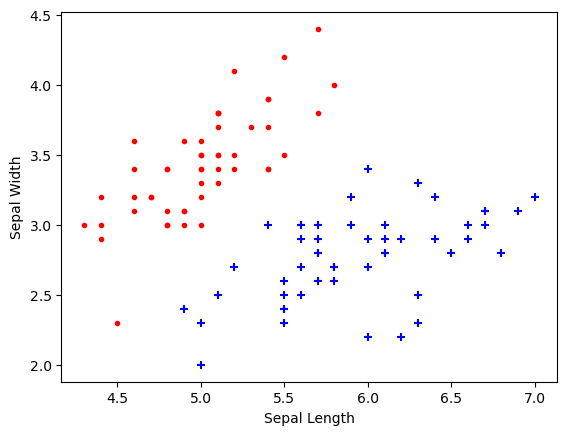

In [36]:
import matplotlib.pyplot as plt 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='.')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')
#plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green',marker='.')

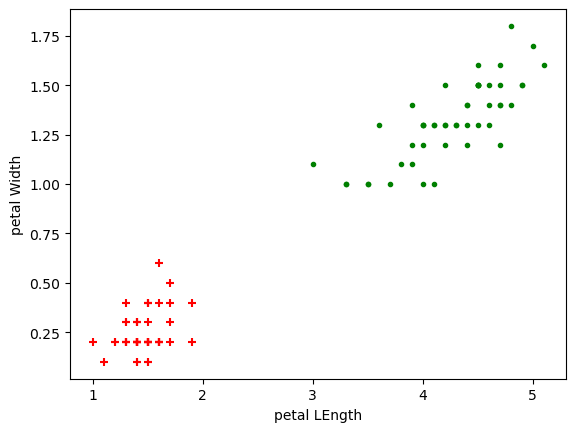

In [37]:
plt.xlabel('petal LEngth')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='.')

In [29]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','flower_name'],axis='columns')
y=df.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
len(X_train)

105

# KNN Model Creation

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
model.predict([[5.1,2.0,3.5,4.1]])
y_pred=model.predict(X_test)
y_pred

A:\Apps\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1,
       0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2,
       0])

In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

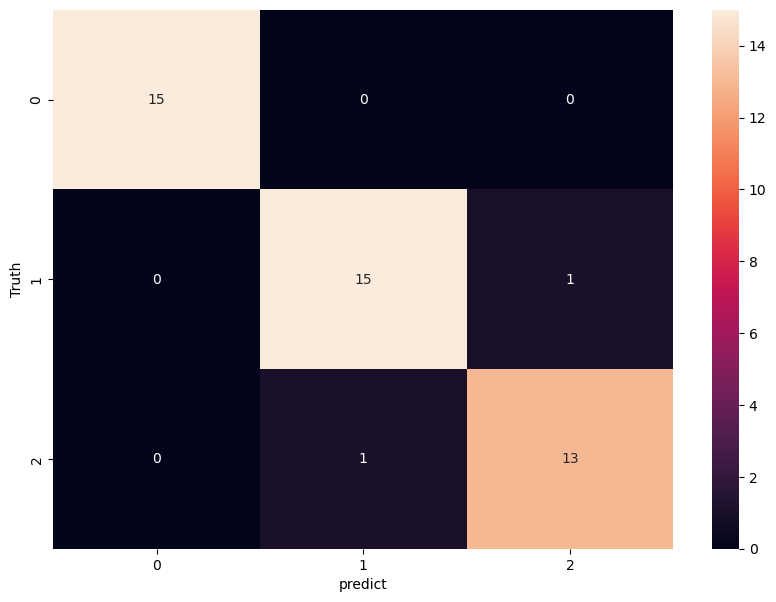

In [48]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('Truth')

In [ ]:
model.score(X_train,y_train)

# Svm 

In [54]:
from sklearn.svm import SVC
mo=SVC()
mo.fit(X_train,y_train)

SVC()

In [55]:
mo.predict(X_test)

array([1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2,
       0])

In [56]:
mo.score(X_train,y_train)

0.9619047619047619